In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None
%matplotlib inline
import matplotlib
#matplotlib.use('agg')
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
from functools import reduce
import pickle as pkl
from multiprocessing import Pool, cpu_count

In [2]:
def decremover(dc):

    new_constituents=[]
    for constituent,decades in dc.items():
        if len(decades)==1:
            if 2000 in decades:
                new_constituents.append(constituent)
    return(new_constituents)

def tupleconverter(tup):
    dicter={}
    for word,decade in tup:
        #print(word,decade)
        if word in dicter:
            dicter[word].append(decade)
        else:
            dicter[word]=[]
            dicter[word].append(decade)
            
    #for word,decades in dicter.items():
        #print(word)
        #print(decades)
        #dicter[word]=Counter(decades)
        #print(dicter[word])
    return(dicter)

def applyParallel(dfGrouped, func):
    with Pool(cpu_count()) as p:
        ret_list = p.map(func, [group for name, group in dfGrouped])
    return pandas.concat(ret_list)

In [3]:
total_compounds_list=pkl.load( open("/data/dharp/compounding/datasets/total_compounds_list.pkl",'rb'))
modifiers, heads = zip(*total_compounds_list)
heads_list=list(set(heads))
modifiers_list=list(set(modifiers))

In [5]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/phrases.csv")
compounds=compounds.query('decade != 2000')
compounds=compounds.reindex()
compounds=compounds.loc[(compounds['modifier'].isin(modifiers_list)) &(compounds['head'].isin(heads_list))]
compounds=compounds.groupby(['modifier','head','context','decade'])['count'].sum().to_frame()
compounds.reset_index(inplace=True)
compounds

,modifier,head,context,decade,count
0,a_n,a_n,professor_n,1970,116
1,a_n,a_n,professor_n,1980,14
2,a_n,a_n,walter_n,1970,58
3,a_n,a_n,walter_n,1980,7
4,a_n,aa_n,a_n,1820,1
5,a_n,aa_n,a_n,1870,3
6,a_n,aa_n,a_n,1920,4
7,a_n,aa_n,a_n,1940,2
8,a_n,aa_n,a_n,1950,8
9,a_n,aa_n,a_n,1960,8


In [ ]:
90679544,52442841

In [6]:
constituents=pd.read_csv("/data/dharp/compounding/datasets/words.csv")
constituents=constituents.reindex()
constituents_list=list(set(zip(constituents["word"],constituents["decade"])))
constituents_list=tupleconverter(constituents_list)
new_constituents=decremover(constituents_list)
constituents=constituents.loc[~constituents['word'].isin(new_constituents)]
constituents=constituents.query('decade != 2000')
constituents=constituents.groupby(['word','context','decade'])['count'].sum().to_frame()
constituents.reset_index(inplace=True)
constituents

,word,context,decade,count
0,a_n,a_a,1800,15
1,a_n,a_a,1810,22
2,a_n,a_a,1820,56
3,a_n,a_a,1830,69
4,a_n,a_a,1840,84
5,a_n,a_a,1850,77
6,a_n,a_a,1860,73
7,a_n,a_a,1870,64
8,a_n,a_a,1880,101
9,a_n,a_a,1890,63


In [7]:
modifiers=constituents.loc[constituents.word.isin(modifiers_list)]
modifiers.columns=['modifier','context','decade','count']
modifiers

,modifier,context,decade,count
0,a_n,a_a,1800,15
1,a_n,a_a,1810,22
2,a_n,a_a,1820,56
3,a_n,a_a,1830,69
4,a_n,a_a,1840,84
5,a_n,a_a,1850,77
6,a_n,a_a,1860,73
7,a_n,a_a,1870,64
8,a_n,a_a,1880,101
9,a_n,a_a,1890,63


In [8]:
heads=constituents.loc[constituents.word.isin(heads_list)]
heads.columns=['head','context','decade','count']
heads

,head,context,decade,count
0,a_n,a_a,1800,15
1,a_n,a_a,1810,22
2,a_n,a_a,1820,56
3,a_n,a_a,1830,69
4,a_n,a_a,1840,84
5,a_n,a_a,1850,77
6,a_n,a_a,1860,73
7,a_n,a_a,1870,64
8,a_n,a_a,1880,101
9,a_n,a_a,1890,63


In [9]:
compound_decade_counts=compounds.groupby(['decade'])['count'].sum().to_frame()
compound_decade_counts.columns=['N']
compound_decade_counts

,N
decade,
1800,2163354
1810,3599680
1820,5640123
1830,8384217
1840,11332996
1850,18354357
1860,16634029
1870,20891349
1880,31475901


In [10]:
XY=compounds.groupby(['modifier','head','decade'])['count'].sum().to_frame()
XY.columns=['a']
X_star=compounds.groupby(['modifier','decade'])['count'].sum().to_frame()
X_star.columns=['x_star']
Y_star=compounds.groupby(['head','decade'])['count'].sum().to_frame()
Y_star.columns=['star_y']
merge1=pd.merge(XY.reset_index(),X_star.reset_index(),on=['modifier','decade'])
information_feat=pd.merge(merge1,Y_star.reset_index(),on=['head','decade'])
information_feat['b']=information_feat['x_star']-information_feat['a']
information_feat['c']=information_feat['star_y']-information_feat['a']
information_feat=pd.merge(information_feat,compound_decade_counts.reset_index(),on=['decade'])
information_feat['d']=information_feat['N']-(information_feat['a']+information_feat['b']+information_feat['c'])
information_feat['x_bar_star']=information_feat['N']-information_feat['x_star']
information_feat['star_y_bar']=information_feat['N']-information_feat['star_y']
#information_feat['LR']=-2*np.sum(information_feat['a']*np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y'])))
information_feat.set_index(['modifier','head','decade'],inplace=True)
information_feat.replace(0,0.001,inplace=True)
information_feat['log_ratio']=2*(information_feat['a']*np.log((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))+\
information_feat['b']*np.log((information_feat['b']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y_bar']))+\
information_feat['c']*np.log((information_feat['c']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y']))+\
information_feat['d']*np.log((information_feat['d']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y_bar'])))
information_feat['ppmi']=np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))
information_feat['local_mi']=information_feat['a']*information_feat['ppmi']
information_feat.ppmi.loc[information_feat.ppmi<=0]=0
information_feat.drop(['a','x_star','star_y','b','c','d','N','d','x_bar_star','star_y_bar'],axis=1,inplace=True)
information_feat

,,,log_ratio,ppmi,local_mi
modifier,head,decade,,,
a_n,a_n,1970,5.025,0.252,43.874
aa_n,a_n,1970,14360.758,7.988,12301.675
aaa_n,a_n,1970,9670.329,8.065,8258.107
aaaa_n,a_n,1970,712.271,9.794,548.487
aaaaa_n,a_n,1970,168.948,10.157,121.884
ab_n,a_n,1970,977.339,5.872,921.875
abc_n,a_n,1970,22.253,1.963,35.335
ac_n,a_n,1970,6.461,1.337,13.371
acceptor_n,a_n,1970,9.492,1.583,17.409


In [11]:
modifier_decade_counts=modifiers.groupby(['decade'])['count'].sum().to_frame()
modifier_decade_counts.columns=['N']
modifier_decade_counts

,N
decade,
1800,211789173
1810,326643810
1820,532856737
1830,677053230
1840,851586199
1850,1232861935
1860,1033602620
1870,1258608494
1880,1720178135


In [12]:
head_decade_counts=heads.groupby(['decade'])['count'].sum().to_frame()
head_decade_counts.columns=['N']
head_decade_counts

,N
decade,
1800,208850437
1810,321971534
1820,525857723
1830,666262746
1840,836852546
1850,1213189146
1860,1015928256
1870,1235459845
1880,1689058986


In [13]:
modifier_denom=modifiers.groupby(['modifier','decade'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
modifier_denom.columns=['modifier_denom']
modifier_denom

modifier_denom
modifier        decade                
a_n             1800        490186.421
                1810        753178.657
                1820       1208089.081
                1830       1624948.716
                1840       1993545.612
                1850       2856652.525
                1860       2488977.538
                1870       3167079.705
                1880       4344130.903
                1890       5469248.385
                1900       7503366.740
                1910       7045774.670
                1920       6767115.594
                1930       6282277.730
                1940       6230692.594
                1950       9383663.112
                1960      16617938.176
                1970      20902463.172
                1980      25915098.403
                1990      39078947.046
aa_n            1800           183.499
                1810           110.250
                1820           100.070
                1830            42.755
                1840            38.575
                1850           285.065
                1860          1032.848
                1870           116.477
                1880           206.741
                1890           147.119
...                                ...
zygapophyseal_n 1960            41.000
                1970             6.000
                1980            22.338
                1990           215.629
zygote_n        1810             5.196
                1880             7.810
                1890           102.981
                1900           233.991
                1910           354.075
                1920           533.093
                1930           658.093
                1940           487.382
                1950           966.509
                1960          2040.444
                1970          2175.370
                1980          2648.337
                1990          3585.335
zygotene_n      1950            10.770
                1960            50.329
                1970            82.006
                1980            94.244
                1990            90.028
zylobalsamum_n  1890            25.456
                1900             2.828
                1910             1.414
                1920             7.071
                1930             1.414
                1960             2.828
                1970             1.414
                1990             4.243

[655317 rows x 1 columns]

In [14]:
head_denom=heads.groupby(['head',"decade"])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
head_denom.columns=['head_denom']
head_denom

head_denom
head          decade             
a_n           1800     490186.421
              1810     753178.657
              1820    1208089.081
              1830    1624948.716
              1840    1993545.612
              1850    2856652.525
              1860    2488977.538
              1870    3167079.705
              1880    4344130.903
              1890    5469248.385
              1900    7503366.740
              1910    7045774.670
              1920    6767115.594
              1930    6282277.730
              1940    6230692.594
              1950    9383663.112
              1960   16617938.176
              1970   20902463.172
              1980   25915098.403
              1990   39078947.046
aa_n          1800        183.499
              1810        110.250
              1820        100.070
              1830         42.755
              1840         38.575
              1850        285.065
              1860       1032.848
              1870        116.477
              1880        206.741
              1890        147.119
...                           ...
zwingli_n     1960        284.070
              1970        253.990
              1980        379.124
              1990        599.258
zygmunt_n     1900          2.000
              1910          5.000
              1920          1.000
              1930          2.000
              1940          2.000
              1950         13.000
              1960          3.606
              1970          7.211
              1980         19.261
              1990        463.927
zygomycetes_n 1970          4.000
              1980         10.000
              1990         18.000
zygote_n      1810          5.196
              1880          7.810
              1890        102.981
              1900        233.991
              1910        354.075
              1920        533.093
              1930        658.093
              1940        487.382
              1950        966.509
              1960       2040.444
              1970       2175.370
              1980       2648.337
              1990       3585.335

[777311 rows x 1 columns]

In [15]:
compound_denom=compounds.groupby(['modifier','head',"decade"])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
compound_denom.columns=['compound_denom']
compound_denom

compound_denom
modifier        head      decade                
a_n             a_n       1970           129.692
                          1980            15.652
                aa_n      1820             1.414
                          1870            12.369
                          1910             8.000
                          1920            18.439
                          1930            10.000
                          1940            21.095
                          1950            74.431
                          1960           168.190
                          1970           189.929
                          1980           313.704
                          1990            95.258
                aaa_n     1810             1.000
                          1820             4.243
                          1870             1.414
                          1900             1.414
                          1910             1.414
                          1920            26.173
                          1930             9.220
                          1940            11.402
                          1950            34.482
                          1960            87.207
                          1970           131.522
                          1980           111.018
                          1990           130.599
                aaaaa_n   1870             1.000
                          1910             1.000
                          1920             3.000
                          1930             1.000
...                                          ...
zygapophyseal_n joint_n   1980            28.320
                          1990           167.800
zygote_n        nucleus_n 1920             3.000
                          1930             6.000
                          1940             2.000
                          1950             8.000
                          1960             4.000
                          1970            11.000
                          1980             7.000
                          1990             1.000
                result_n  1920             2.236
                          1930             3.000
                          1950             5.000
                          1960            12.530
                          1970            10.000
                          1980             9.220
                          1990            10.817
zygotene_n      stage_n   1950             4.000
                          1960            18.000
                          1970            22.000
                          1980            31.000
                          1990            19.000
zylobalsamum_n  process_n 1890            25.456
                          1900             2.828
                          1910             1.414
                          1920             7.071
                          1930             1.414
                          1960             2.828
                          1970             1.414
                          1990             4.243

[7564734 rows x 1 columns]

In [23]:
mod_cols=modifiers.columns.tolist()
mod_cols[-1]="mod_count"
modifiers.columns=mod_cols
#compounds.drop(['comp_count'],axis=1,inplace=True)
comp_cols=compounds.columns.tolist()
comp_cols[-1]="comp_count"
compounds.columns=comp_cols
compound_modifier_sim=pd.merge(compounds,modifiers,on=["modifier","context",'decade'])
compound_modifier_sim['numerator']=compound_modifier_sim['comp_count']*compound_modifier_sim['mod_count']
compound_modifier_sim=compound_modifier_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
compound_modifier_sim=pd.merge(compound_modifier_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head",'decade'])
compound_modifier_sim=pd.merge(compound_modifier_sim,modifier_denom.reset_index(),on=['modifier','decade'])
compound_modifier_sim['sim_with_modifier']=compound_modifier_sim['numerator']/(compound_modifier_sim['compound_denom']*compound_modifier_sim['modifier_denom'])
compound_modifier_sim.set_index(['modifier','head','decade'],inplace=True)
compound_modifier_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_modifier_sim

modifier_denom  sim_with_modifier
modifier        head           decade                                   
a_n             a_n            1970      20902463.172              0.002
                aa_n           1970      20902463.172              0.000
                aaa_n          1970      20902463.172              0.002
                aaaaa_n        1970      20902463.172              0.002
                addison_n      1970      20902463.172              0.000
                albert_n       1970      20902463.172              0.001
                anti_n         1970      20902463.172              0.012
                appendix_n     1970      20902463.172              0.008
                archive_n      1970      20902463.172              0.000
                area_n         1970      20902463.172              0.010
                arginine_n     1970      20902463.172              0.000
                asset_n        1970      20902463.172              0.008
                atom_n         1970      20902463.172              0.752
                b_n            1970      20902463.172              0.016
                baby_n         1970      20902463.172              0.001
                band_n         1970      20902463.172              0.110
                bank_n         1970      20902463.172              0.009
                banking_n      1970      20902463.172              0.006
                baseball_n     1970      20902463.172              0.000
                basic_n        1970      20902463.172              0.004
                bb_n           1970      20902463.172              0.002
                behavior_n     1970      20902463.172              0.007
                behavioral_n   1970      20902463.172              0.007
                bell_n         1970      20902463.172              0.004
                belle_n        1970      20902463.172              0.000
                bend_n         1970      20902463.172              0.000
                berkley_n      1970      20902463.172              0.003
                bibliography_n 1970      20902463.172              0.009
                bill_n         1970      20902463.172              0.031
                biographical_n 1970      20902463.172              0.001
...                                               ...                ...
zygapophyseal_n joint_n        1980            22.338              0.692
                               1990           215.629              0.647
zygote_n        nucleus_n      1920           533.093              0.302
                result_n       1920           533.093              0.261
                nucleus_n      1930           658.093              0.368
                result_n       1930           658.093              0.237
                nucleus_n      1940           487.382              0.324
                               1950           966.509              0.398
                result_n       1950           966.509              0.330
                nucleus_n      1960          2040.444              0.333
                result_n       1960          2040.444              0.297
                nucleus_n      1970          2175.370              0.357
                result_n       1970          2175.370              0.331
                nucleus_n      1980          2648.337              0.344
                result_n       1980          2648.337              0.273
                nucleus_n      1990          3585.335              0.359
                result_n       1990          3585.335              0.223
zygotene_n      stage_n        1950            10.770              0.371
                               1960            50.329              0.358
                               1970            82.006              0.268
                               1980            94.244              0.329
                               1990            90.028              0.211
zylobalsamum_n  process_

In [24]:
compound_modifier_sim.sim_with_modifier.describe()

count   6838479.000
mean          0.151
std           0.225
min           0.000
25%           0.006
50%           0.038
75%           0.201
max           1.000
Name: sim_with_modifier, dtype: float64

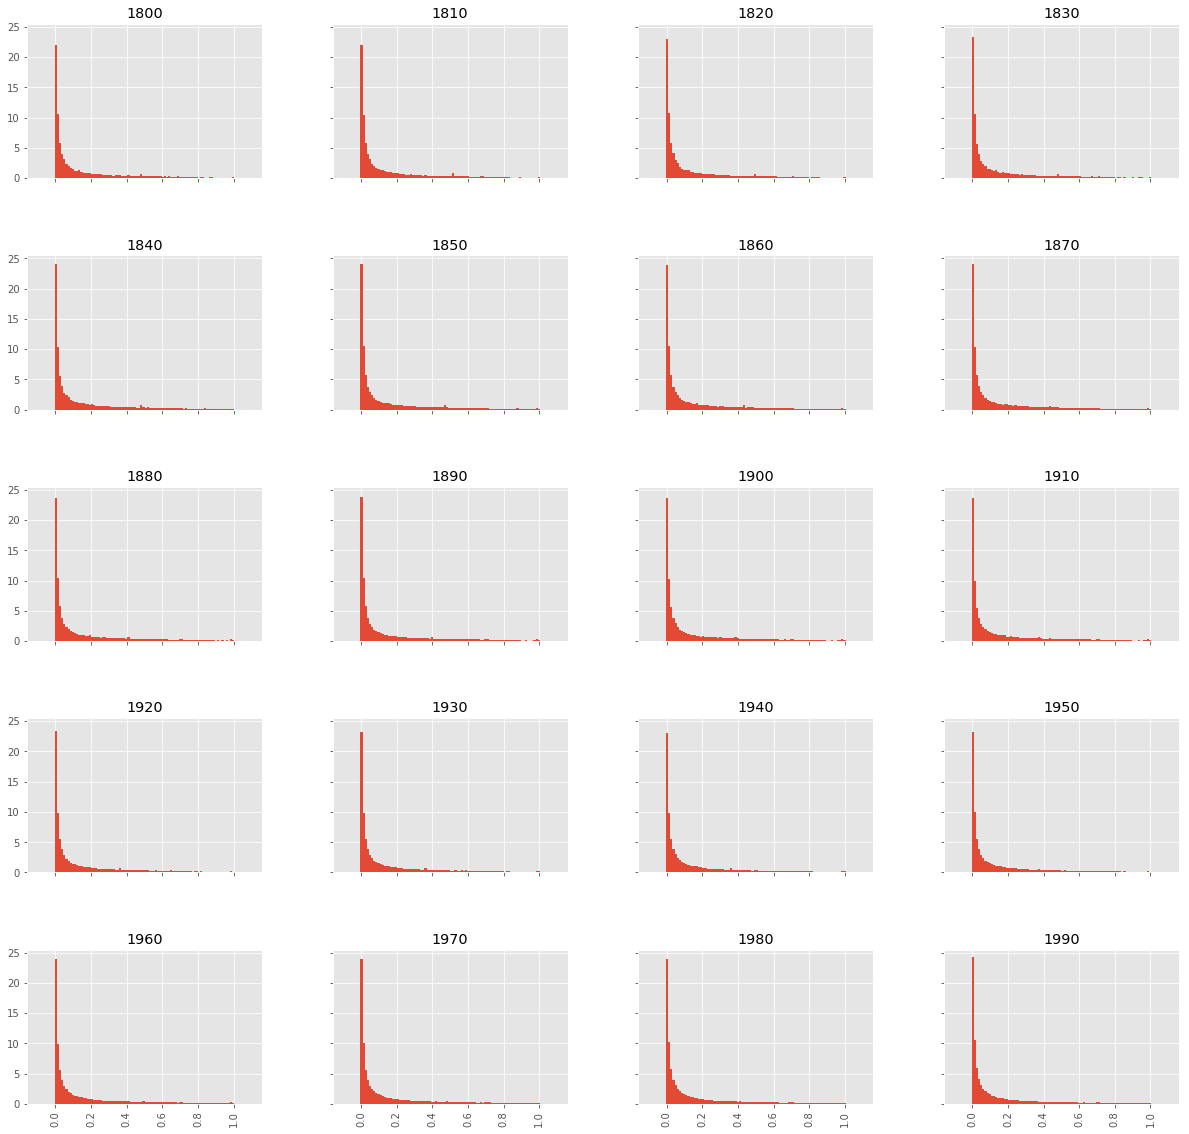

In [20]:
_=compound_modifier_sim.hist(by= 'decade',column ='sim_with_modifier', figsize=(20, 20),bins=100,density=True,sharex=True,sharey=True,range=(-0.1,1.1))

In [21]:
head_cols=heads.columns.tolist()
head_cols[-1]="head_count"
heads.columns=head_cols

compound_head_sim=pd.merge(compounds,heads,on=["head","context",'decade'])
compound_head_sim['numerator']=compound_head_sim['comp_count']*compound_head_sim['head_count']
compound_head_sim=compound_head_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
compound_head_sim=pd.merge(compound_head_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head",'decade'])
compound_head_sim=pd.merge(compound_head_sim,head_denom.reset_index(),on=['head','decade'])
compound_head_sim['sim_with_head']=compound_head_sim['numerator']/(compound_head_sim['compound_denom']*compound_head_sim['head_denom'])
compound_head_sim.set_index(['modifier','head','decade'],inplace=True)
compound_head_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_head_sim

,,,head_denom,sim_with_head
modifier,head,decade,,
a_n,a_n,1970,20902463.172,0.002
aa_n,a_n,1970,20902463.172,0.002
aaa_n,a_n,1970,20902463.172,0.002
aaaa_n,a_n,1970,20902463.172,0.002
aaaaa_n,a_n,1970,20902463.172,0.002
ab_n,a_n,1970,20902463.172,0.011
abc_n,a_n,1970,20902463.172,0.009
ac_n,a_n,1970,20902463.172,0.002
acceptor_n,a_n,1970,20902463.172,0.001


In [25]:
compound_head_sim.sim_with_head.describe()

count   7376609.000
mean          0.140
std           0.213
min           0.000
25%           0.005
50%           0.034
75%           0.182
max           1.000
Name: sim_with_head, dtype: float64

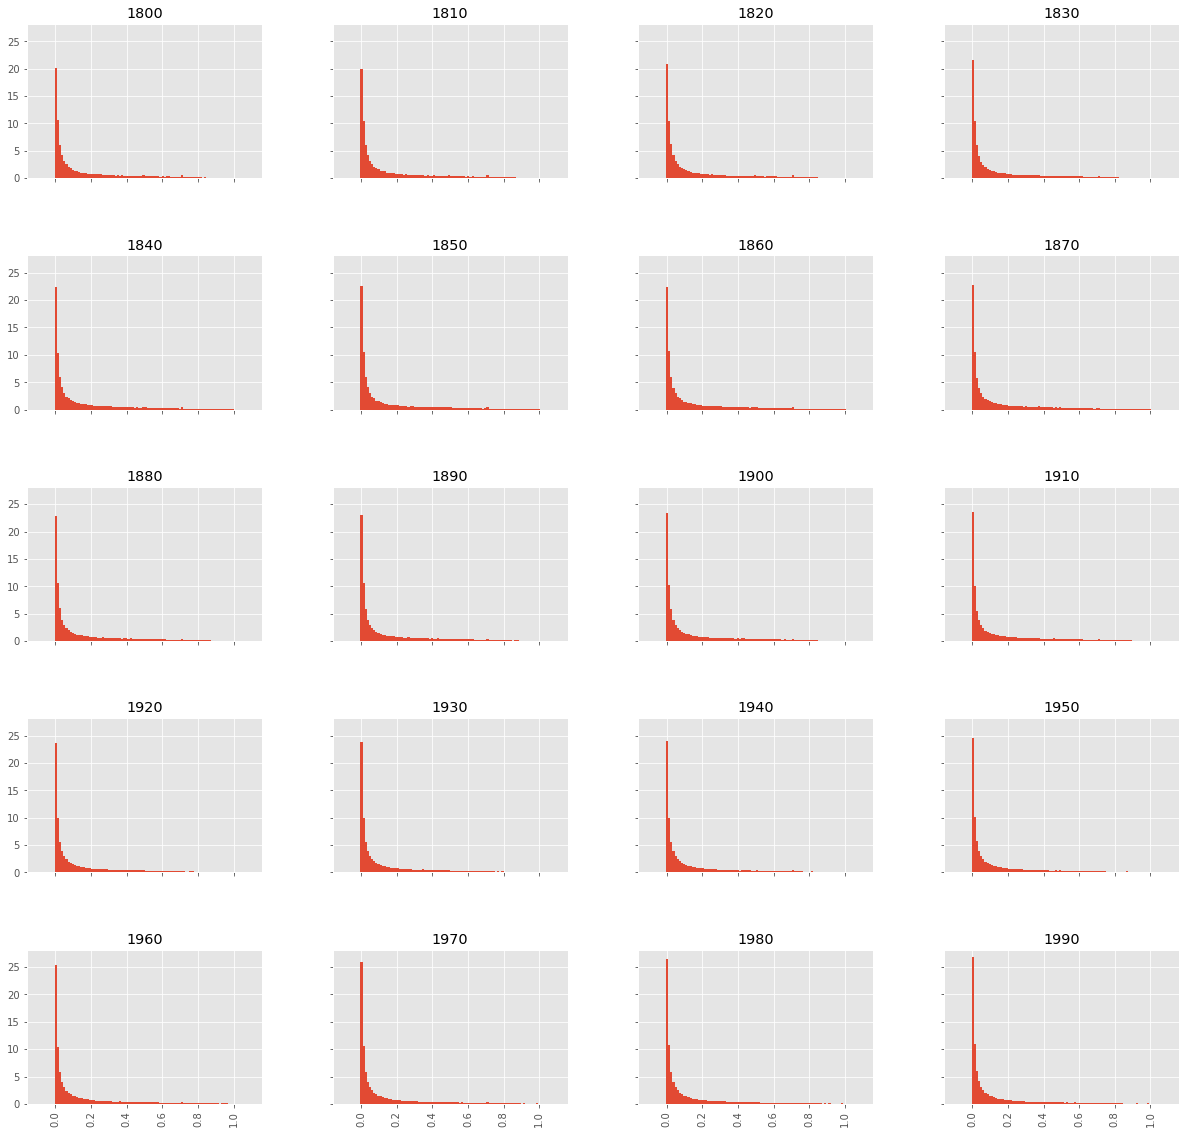

In [26]:
_=compound_head_sim.hist(by= 'decade',column ='sim_with_head', figsize=(20, 20),bins=100,density=True,sharex=True,sharey=True,range=(-0.1,1.1))

In [27]:
constituent_sim=pd.merge(heads,compounds,on=["head","context","decade"])
#constituent_sim.drop('comp_count',axis=1,inplace=True)
constituent_sim=pd.merge(constituent_sim,modifiers,on=["modifier","context","decade"])
constituent_sim['numerator']=constituent_sim['head_count']*constituent_sim['mod_count']
constituent_sim=constituent_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
constituent_sim=pd.merge(constituent_sim.reset_index(),head_denom.reset_index(),on=["head","decade"])
constituent_sim=pd.merge(constituent_sim,modifier_denom.reset_index(),on=["modifier","decade"])
constituent_sim['sim_bw_constituents']=constituent_sim['numerator']/(constituent_sim['head_denom']*constituent_sim['modifier_denom'])
constituent_sim.set_index(['modifier','head','decade'],inplace=True)
constituent_sim.drop(['numerator','modifier_denom','head_denom'],axis=1,inplace=True)
constituent_sim

sim_bw_constituents
modifier   head            decade                     
a_n        a_n             1970                  0.000
           aa_n            1970                  0.001
           aaa_n           1970                  0.001
           aaaaa_n         1970                  0.002
           addison_n       1970                  0.000
           albert_n        1970                  0.000
           anti_n          1970                  0.000
           appendix_n      1970                  0.003
           archive_n       1970                  0.000
           area_n          1970                  0.000
           arginine_n      1970                  0.000
           asset_n         1970                  0.000
           atom_n          1970                  0.546
           b_n             1970                  0.685
           baby_n          1970                  0.000
           band_n          1970                  0.555
           bank_n          1970                  0.000
           banking_n       1970                  0.000
           baseball_n      1970                  0.000
           basic_n         1970                  0.000
           bb_n            1970                  0.001
           behavior_n      1970                  0.000
           behavioral_n    1970                  0.001
           bell_n          1970                  0.001
           belle_n         1970                  0.000
           bend_n          1970                  0.001
           berkley_n       1970                  0.003
           bibliography_n  1970                  0.008
           bill_n          1970                  0.006
           biographical_n  1970                  0.000
...                                                ...
yom_n      kippur_n        1920                  0.140
                           1930                  0.116
                           1940                  0.119
                           1950                  0.093
                           1960                  0.086
                           1970                  0.320
                           1980                  0.345
                           1990                  0.276
younger_n  pliny_n         1820                  0.000
zambia_n   demographic_n   1890                  0.098
zeno_n     altarpiece_n    1910                  0.005
           practising_n    1910                  0.000
                           1870                  0.007
                           1890                  0.005
                           1900                  0.000
zeta_n     eta_n           1810                  0.667
                           1850                  0.647
                           1860                  0.627
zirconia_n polycrystals_n  1950                  0.003
zn_n       ga_n            1910                  0.380
zone_n     flung_n         1820                  0.000
                           1830                  0.001
zoo_n      pottet_n        1850                  0.535
                           1870                  0.364
                           1880                  0.033
                           1890                  0.010
                           1900                  0.037
                           1910                  0.004
zoologie_n experimentale_n 1870                  0.143
                           1880                  0.062

[6660624 rows x 1 columns]

In [28]:
constituent_sim.sim_bw_constituents.describe()

count   6660624.000
mean          0.080
std           0.172
min           0.000
25%           0.000
50%           0.001
75%           0.032
max           1.000
Name: sim_bw_constituents, dtype: float64

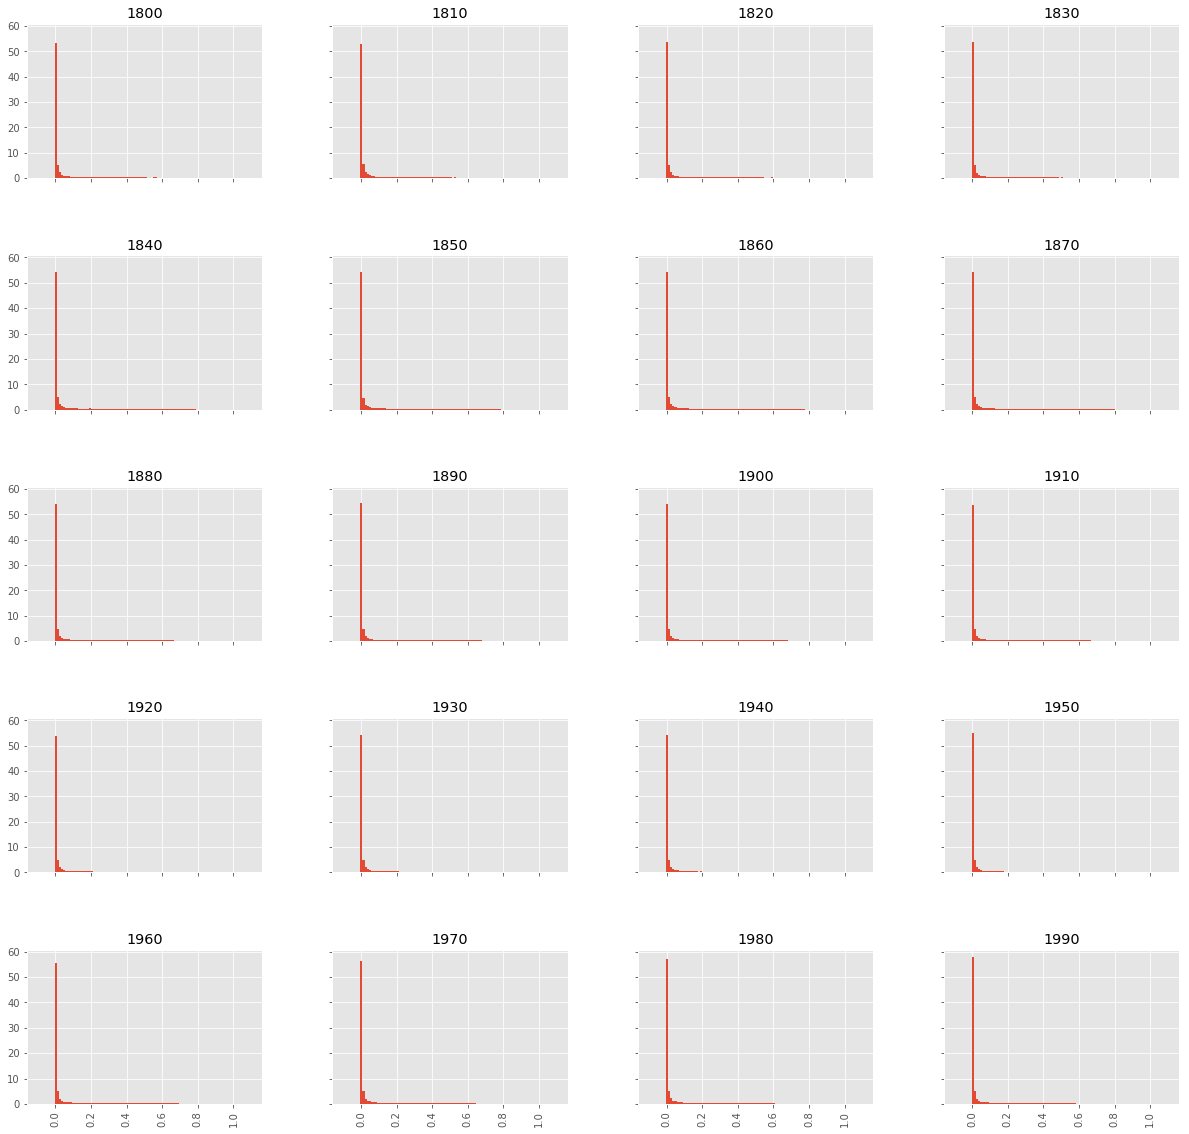

In [29]:
_=constituent_sim.hist(by= 'decade',column ='sim_bw_constituents', figsize=(20, 20),bins=100,density=True,sharex=True,sharey=True,range=(-0.1,1.1))

In [30]:
dfs = [constituent_sim.reset_index(), compound_head_sim.reset_index(), compound_modifier_sim.reset_index(), information_feat.reset_index()]
compounds_final = reduce(lambda left,right: pd.merge(left,right,on=['modifier','head','decade']), dfs)
compounds_final.drop(['head_denom','modifier_denom'],axis=1,inplace=True)
compounds_final=pd.pivot_table(compounds_final, index=['modifier','head'], columns=['decade'])
compounds_final.fillna(0,inplace=True)
compounds_final -= compounds_final.min()
compounds_final /= compounds_final.max()
compounds_final_1=compounds_final.columns.get_level_values(0)
compounds_final_2=compounds_final.columns.get_level_values(1)

cur_year=0
new_columns=[]
for year in compounds_final_2:
    new_columns.append(str(year)+"_"+compounds_final_1[cur_year])
    cur_year+=1
compounds_final.columns=new_columns
compounds_final

1800_local_mi  1810_local_mi  1820_local_mi  \
modifier        head                                                            
a_n             a_n                       0.001          0.003          0.002   
                aa_n                      0.001          0.003          0.002   
                aaa_n                     0.001          0.003          0.003   
                aaaaa_n                   0.001          0.003          0.002   
                adam_n                    0.001          0.003          0.002   
                addison_n                 0.001          0.003          0.002   
                administration_n          0.001          0.003          0.002   
                albert_n                  0.001          0.003          0.002   
                american_n                0.001          0.003          0.002   
                anti_n                    0.001          0.003          0.002   
                appendix_n                0.001          0.003          0.002   
                aqueduct_n                0.001          0.003          0.002   
                archive_n                 0.001          0.003          0.002   
                area_n                    0.001          0.003          0.002   
                arginine_n                0.001          0.003          0.002   
                asset_n                   0.001          0.003          0.002   
                atom_n                    0.001          0.003          0.002   
                b_n                       0.003          0.004          0.006   
                baby_n                    0.001          0.003          0.002   
                balance_n                 0.001          0.003          0.002   
                ballantine_n              0.001          0.003          0.002   
                ballet_n                  0.001          0.003          0.002   
                band_n                    0.001          0.003          0.002   
                bank_n                    0.001          0.003          0.002   
                banking_n                 0.001          0.003          0.002   
                baseball_n                0.001          0.003          0.002   
                basic_n                   0.001          0.003          0.002   
                battlefield_n             0.001          0.003          0.002   
                bb_n                      0.001          0.003          0.002   
                bed_n                     0.001          0.003          0.002   
...                                         ...            ...            ...   
zurich_n        conference_n              0.001          0.003          0.002   
                congress_n                0.001          0.003          0.002   
                federal_n                 0.001          0.003          0.002   
                general_n                 0.001          0.003          0.002   
                government_n              0.001          0.003          0.002   
                institute_n               0.001          0.003          0.002   
                james_n                   0.001          0.003          0.002   
                market_n                  0.001          0.003          0.002   
                medical_n                 0.001          0.003          0.002   
                opera_n                   0.001          0.003          0.002   
                peasantry_n               0.001          0.003          0.002   
                polytechnic_n             0.001          0.003          0.002   
                research_n                0.001          0.003          0.002   
                school_n                  0.001          0.003          0.002   
                seminar_n                 0.001          0.003          0.002   
                speech_n                  0.001          0.003          0.002   
                stock_n                   0.001          0.003   

In [31]:
compounds_final.to_csv("/data/dharp/compounding/datasets/DFM_Non_Contextual_Temporal.csv",sep='\t')